In [1]:
from IPython.display import display

import cv2
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import structural_similarity as SSIM
from yolov5.detect import run as yolo_detect

%matplotlib inline

In [2]:
data_path = "../data/"
video_path = "ADS HG.MP4"
path = data_path + video_path

cap = cv2.VideoCapture(path)

width = int(cap.get(3))
height = int(cap.get(4))
frame_rate = cap.get(5)
num_frames = int(cap.get(7))

frames = []
idx = 0
while(cap.isOpened() and idx < num_frames):
    ret, frame = cap.read()

    if ret == True:
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        idx += 1
    else:
        pass
        # print("There is some problem")

cap.release()

print("Video width = " + str(width))
print("Video height = " + str(height))
print("Frame rate = " + str(frame_rate))
print("Number of frames: " + str(num_frames))

print("Frames recieved = " + str(len(frames)))


Video width = 1920
Video height = 1080
Frame rate = 239.76023976023976
Number of frames: 5535
Frames recieved = 5535


YOLOv5 🚀 v7.0-12-g7f5724b Python-3.10.6 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs


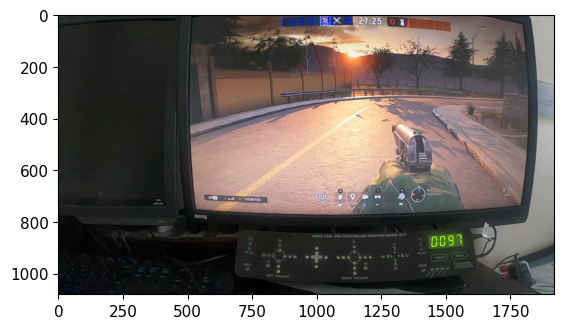

In [3]:
# Just to check the frames
temp_img = frames[1]
save_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
cv2.imwrite("./temp/test_img.jpg", save_img)

predictions = yolo_detect(source="./temp/test_img.jpg", weights='best.pt')

plt.imshow(temp_img, cmap='gray')
plt.show()

In [4]:
centre_x = int(predictions[1][2] * height)
centre_y = int(predictions[1][1] * width)
detect_width = int(predictions[1][4] * height)
detect_height = int(predictions[1][3] * width)

start_idx_x = int(centre_x - detect_width * 0.65)
last_idx_x = int(centre_x + detect_width * 0.65)
start_idx_y = int(centre_y - detect_height * 0.65)
last_idx_y = int(centre_y + detect_height * 0.65)

print("Start index x = " + str(start_idx_x))
print("Last index x = " + str(last_idx_x))
print("Start index y = " + str(start_idx_y))
print("Last index y = " + str(last_idx_y))


Start index x = 784
Last index x = 1071
Start index y = 584
Last index y = 1793


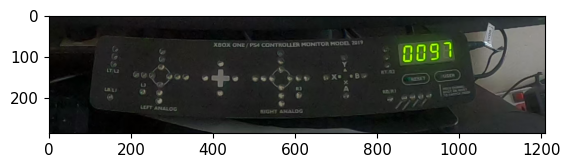

In [5]:
# start_idx_x = 700
# last_idx_x = 1080
# start_idx_y = 500
# last_idx_y = 1700

start_idx_x = int(centre_x - detect_width * 0.65)
last_idx_x = int(centre_x + detect_width * 0.65)
start_idx_y = int(centre_y - detect_height * 0.65)
last_idx_y = int(centre_y + detect_height * 0.65)

bottom_frame_set = []
for i in range(len(frames)):
    bottom_frame_set.append(frames[i][start_idx_x : last_idx_x, start_idx_y : last_idx_y])

temp_img = bottom_frame_set[0]
plt.imshow(temp_img, cmap='gray')
plt.show()

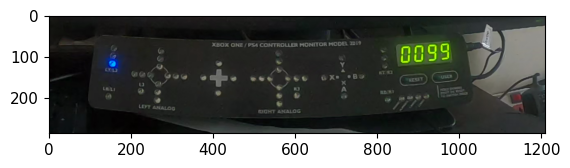

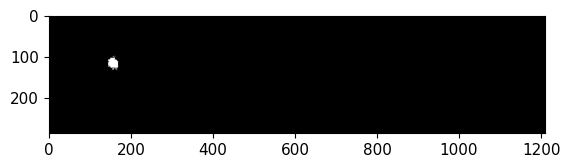

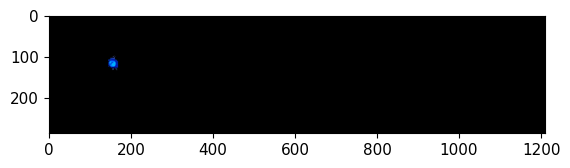

Total number of white pixels 529


In [6]:
#450 Has 1 blip
# 422 to 423 has a blip in between

# Blue detection in the bottom images
temp_img = bottom_frame_set[423]

temp_img_hsv = cv2.cvtColor(temp_img, cv2.COLOR_RGB2HSV)

lower_blue = np.array([90, 100, 140])
upper_blue = np.array([150, 255, 255])

mask = cv2.inRange(temp_img_hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(temp_img, temp_img, mask = mask)

plt.imshow(temp_img, cmap='gray')
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()
plt.imshow(result, cmap='gray')
plt.show()

mask = np.array(mask)
print("Total number of white pixels " + str(int(np.sum(mask)/255)))

In [7]:
#450 Has 1 blip
# 422 to 423 has a blip in between

# Blue detection in the bottom images
trigger_points = np.zeros((len(frames)))
trigger_counted = False

for i in range(len(bottom_frame_set)):
    if i % 1000 == 0:
        print("Number of frames done "+ str(i))
    temp_img = bottom_frame_set[i]

    temp_img_hsv = cv2.cvtColor(temp_img, cv2.COLOR_RGB2HSV)

    lower_blue = np.array([90, 100, 140])
    upper_blue = np.array([150, 255, 255])

    mask = cv2.inRange(temp_img_hsv, lower_blue, upper_blue)
    result = cv2.bitwise_and(temp_img, temp_img, mask = mask)
    mask = np.array(mask)
    num_white_pix = int(np.sum(mask)/255)

    if num_white_pix > 300 and trigger_counted == False:
        trigger_points[i] = 1
        trigger_counted = True
    
    if num_white_pix <= 300:
        trigger_counted = False

print("All frames considered")

trigger_loc = []
for i in range(len(trigger_points)):
    if trigger_points[i] == 1:
        trigger_loc.append(i)

print("Number of trigger locations ", len(trigger_loc))
print("All the trigger locations ", trigger_loc)

Number of frames done 0
Number of frames done 1000
Number of frames done 2000
Number of frames done 3000
Number of frames done 4000
Number of frames done 5000
All frames considered
Number of trigger locations  18
All the trigger locations  [423, 684, 958, 1227, 1496, 1766, 2046, 2324, 2596, 2876, 3144, 3418, 3685, 3954, 4234, 4490, 4775, 5055]


In [8]:
centre_x = int(predictions[0][2] * height)
centre_y = int(predictions[0][1] * width)
detect_width = int(predictions[0][3] * height)
detect_height = int(predictions[0][4] * width)

start_idx_x = int(centre_x - detect_width/2)
last_idx_x = int(centre_x + detect_width/2)
start_idx_y = int(centre_y - detect_height/2)
last_idx_y = int(centre_y + detect_height/2)

print("Start index x = " + str(start_idx_x))
print("Last index x = " + str(last_idx_x))
print("Start index y = " + str(start_idx_y))
print("Last index y = " + str(last_idx_y))

Start index x = 59
Last index x = 772
Start index y = 481
Last index y = 1908


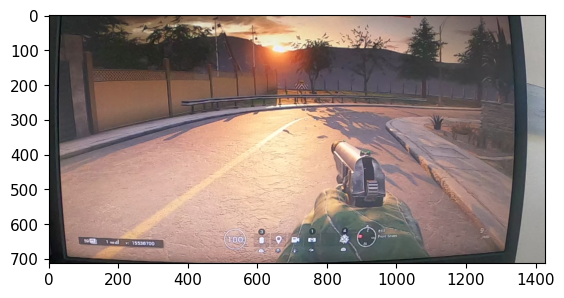

In [9]:
# start_idx_x = 0
# last_idx_x = 800
# start_idx_y = 500
# last_idx_y = 1800

start_idx_x = int(centre_x - detect_width/2)
last_idx_x = int(centre_x + detect_width/2)
start_idx_y = int(centre_y - detect_height/2)
last_idx_y = int(centre_y + detect_height/2)

top_frame_set = []
for i in range(len(frames)):
    top_frame_set.append(frames[i][start_idx_x : last_idx_x, start_idx_y : last_idx_y])

temp_img = top_frame_set[0]
plt.imshow(temp_img, cmap='gray')
plt.show()

In [10]:
# Taking boxes around these points
centre_idx_x = [200, 400, 600]
centre_idx_y = [200, 400, 600, 800, 1000, 1200]
size_xy = 20

old_frame = top_frame_set[0]
new_frame = top_frame_set[0]
min_ssim_values = []
for i in range(len(top_frame_set) - 10):
    old_frame = np.array(top_frame_set[i])
    new_frame = np.array(top_frame_set[i + 3])
    old_patches = []
    new_patches = []
    for j in range(len(centre_idx_x)):
        for k in range(len(centre_idx_y)):
            old_patches.append(old_frame[centre_idx_x[j] - size_xy : centre_idx_x[j] + size_xy,
                                        centre_idx_y[k] - size_xy : centre_idx_y[k] + size_xy, :])
            new_patches.append(new_frame[centre_idx_x[j] - size_xy : centre_idx_x[j] + size_xy,
                                        centre_idx_y[k] - size_xy : centre_idx_y[k] + size_xy, :])
    old_patches = np.array(old_patches)
    new_patches = np.array(new_patches)
    
    ssim_values = []
    for j in range(len(old_patches)):
        ssim_values.append(SSIM(old_patches[j], new_patches[j], channel_axis=2))
    ssim_values.sort()
    min_ssim_values.append(np.sum(ssim_values[:5]))

In [11]:
action_loc = []
ssim_threshold = 2.5
for val in trigger_loc:
    action_point_found = False
    for i in range(val, val + 50):
        if min_ssim_values[i] < ssim_threshold and action_point_found == False:
            action_loc.append(i)
            action_point_found = True
    if action_point_found == False:
        action_loc.append(-1)
print("All the action locations are " + str(action_loc))

All the action locations are [447, 707, 978, 1250, 1518, 1790, 2069, 2345, 2617, 2897, 3168, 3440, 3708, 3976, 4255, 4511, 4799, 5079]


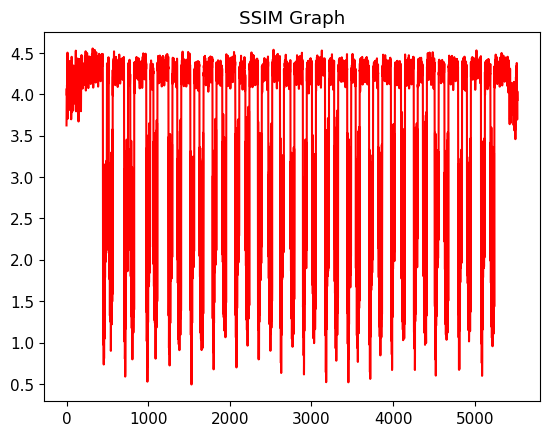

In [12]:
x = range(len(min_ssim_values))
y = min_ssim_values
plt.title("SSIM Graph")
plt.plot(y, color="red")

plt.show()

In [13]:
frame_diff = []
for i in range(len(action_loc)):
    frame_diff.append(action_loc[i] - trigger_loc[i])
print(frame_diff)

[24, 23, 20, 23, 22, 24, 23, 21, 21, 21, 24, 22, 23, 22, 21, 21, 24, 24]


In [14]:
time_diff = []
for i in range(len(frame_diff)):
    time_diff.append(frame_diff[i] / frame_rate * 1000)
print(time_diff)

[100.10000000000001, 95.92916666666666, 83.41666666666667, 95.92916666666666, 91.75833333333333, 100.10000000000001, 95.92916666666666, 87.5875, 87.5875, 87.5875, 100.10000000000001, 91.75833333333333, 95.92916666666666, 91.75833333333333, 87.5875, 87.5875, 100.10000000000001, 100.10000000000001]


In [15]:
average_time_difference = sum(time_diff) / len(time_diff)
print("The average time difference of the action is " + str(average_time_difference) + " milli-seconds")

The average time difference of the action is 93.38032407407407 milli-seconds


In [ ]:
# ADS HG.MP4 - Average Response time is 93.38 sec
# Camera Right.MP4 - Average Response time is 87.92 sec
